In [1]:
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

In [4]:
#Importing the dataset
df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [5]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
import seaborn as sns

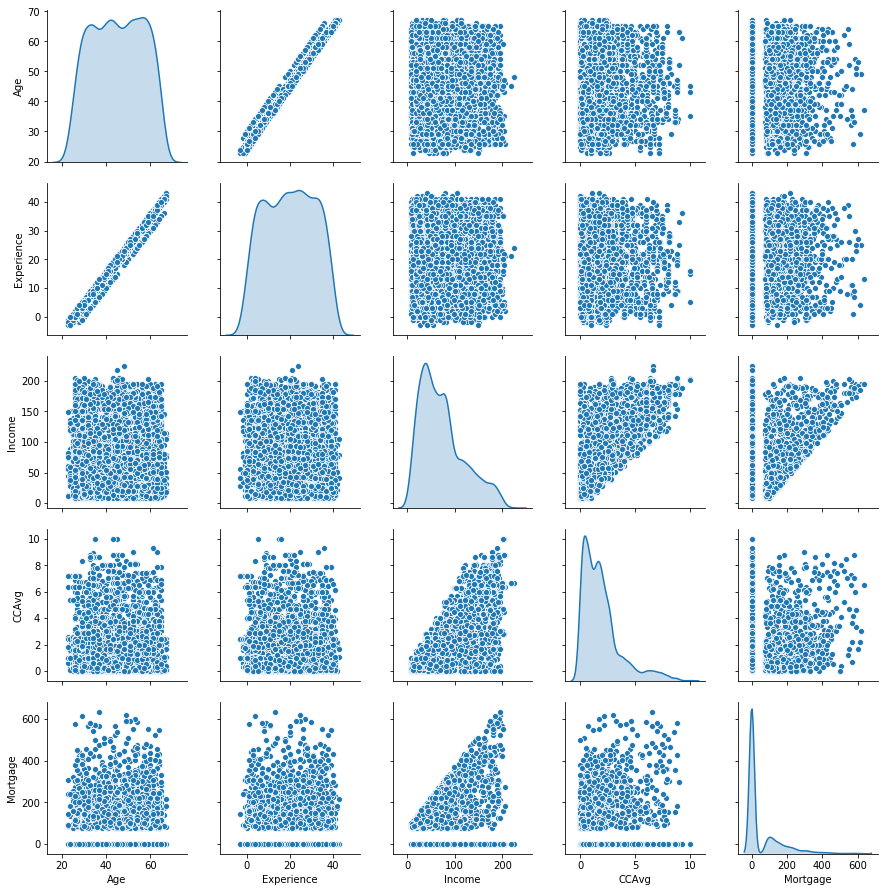

In [10]:
#I see that below 5 variables are the ones which need to be seen for how the distribution is
#because the other variables are categorical, the result is either 0 or 1 in which the 
#0 or 1 do not have a bearance on the output of the variable.

sns.pairplot(df[['Age','Experience','Income','CCAvg','Mortgage']],diag_kind='kde')

In [11]:
#Analysis of the Variables(Univariate Analysis)
#1.Age: The age variable seems to be symmetrically distributed, with not a perfect Gaussian structure
#but having some variations in the central value
#2.Experience: I see the same trend as above in this column
#3.Income: Does seem to have some outliers in the dataset which are pulling the mean towards the right
#The mean is heavily impacted by the outliers and so does the income variable thus we are able to see
#long thin tails in the dataset towards the right side.
#CCAvg has a lot of outliers in the dataset which is again pulling the mean towards its direction in the
#right side and also some outiers seem to be cluttered towards the right side
#Mortgage: I see that more than 3000 records have this value as zero, which implies that 
#most of the people do not have/or have not declared any mortgage income, this will be a column
#with a low variance filter and would not help me much in my model making

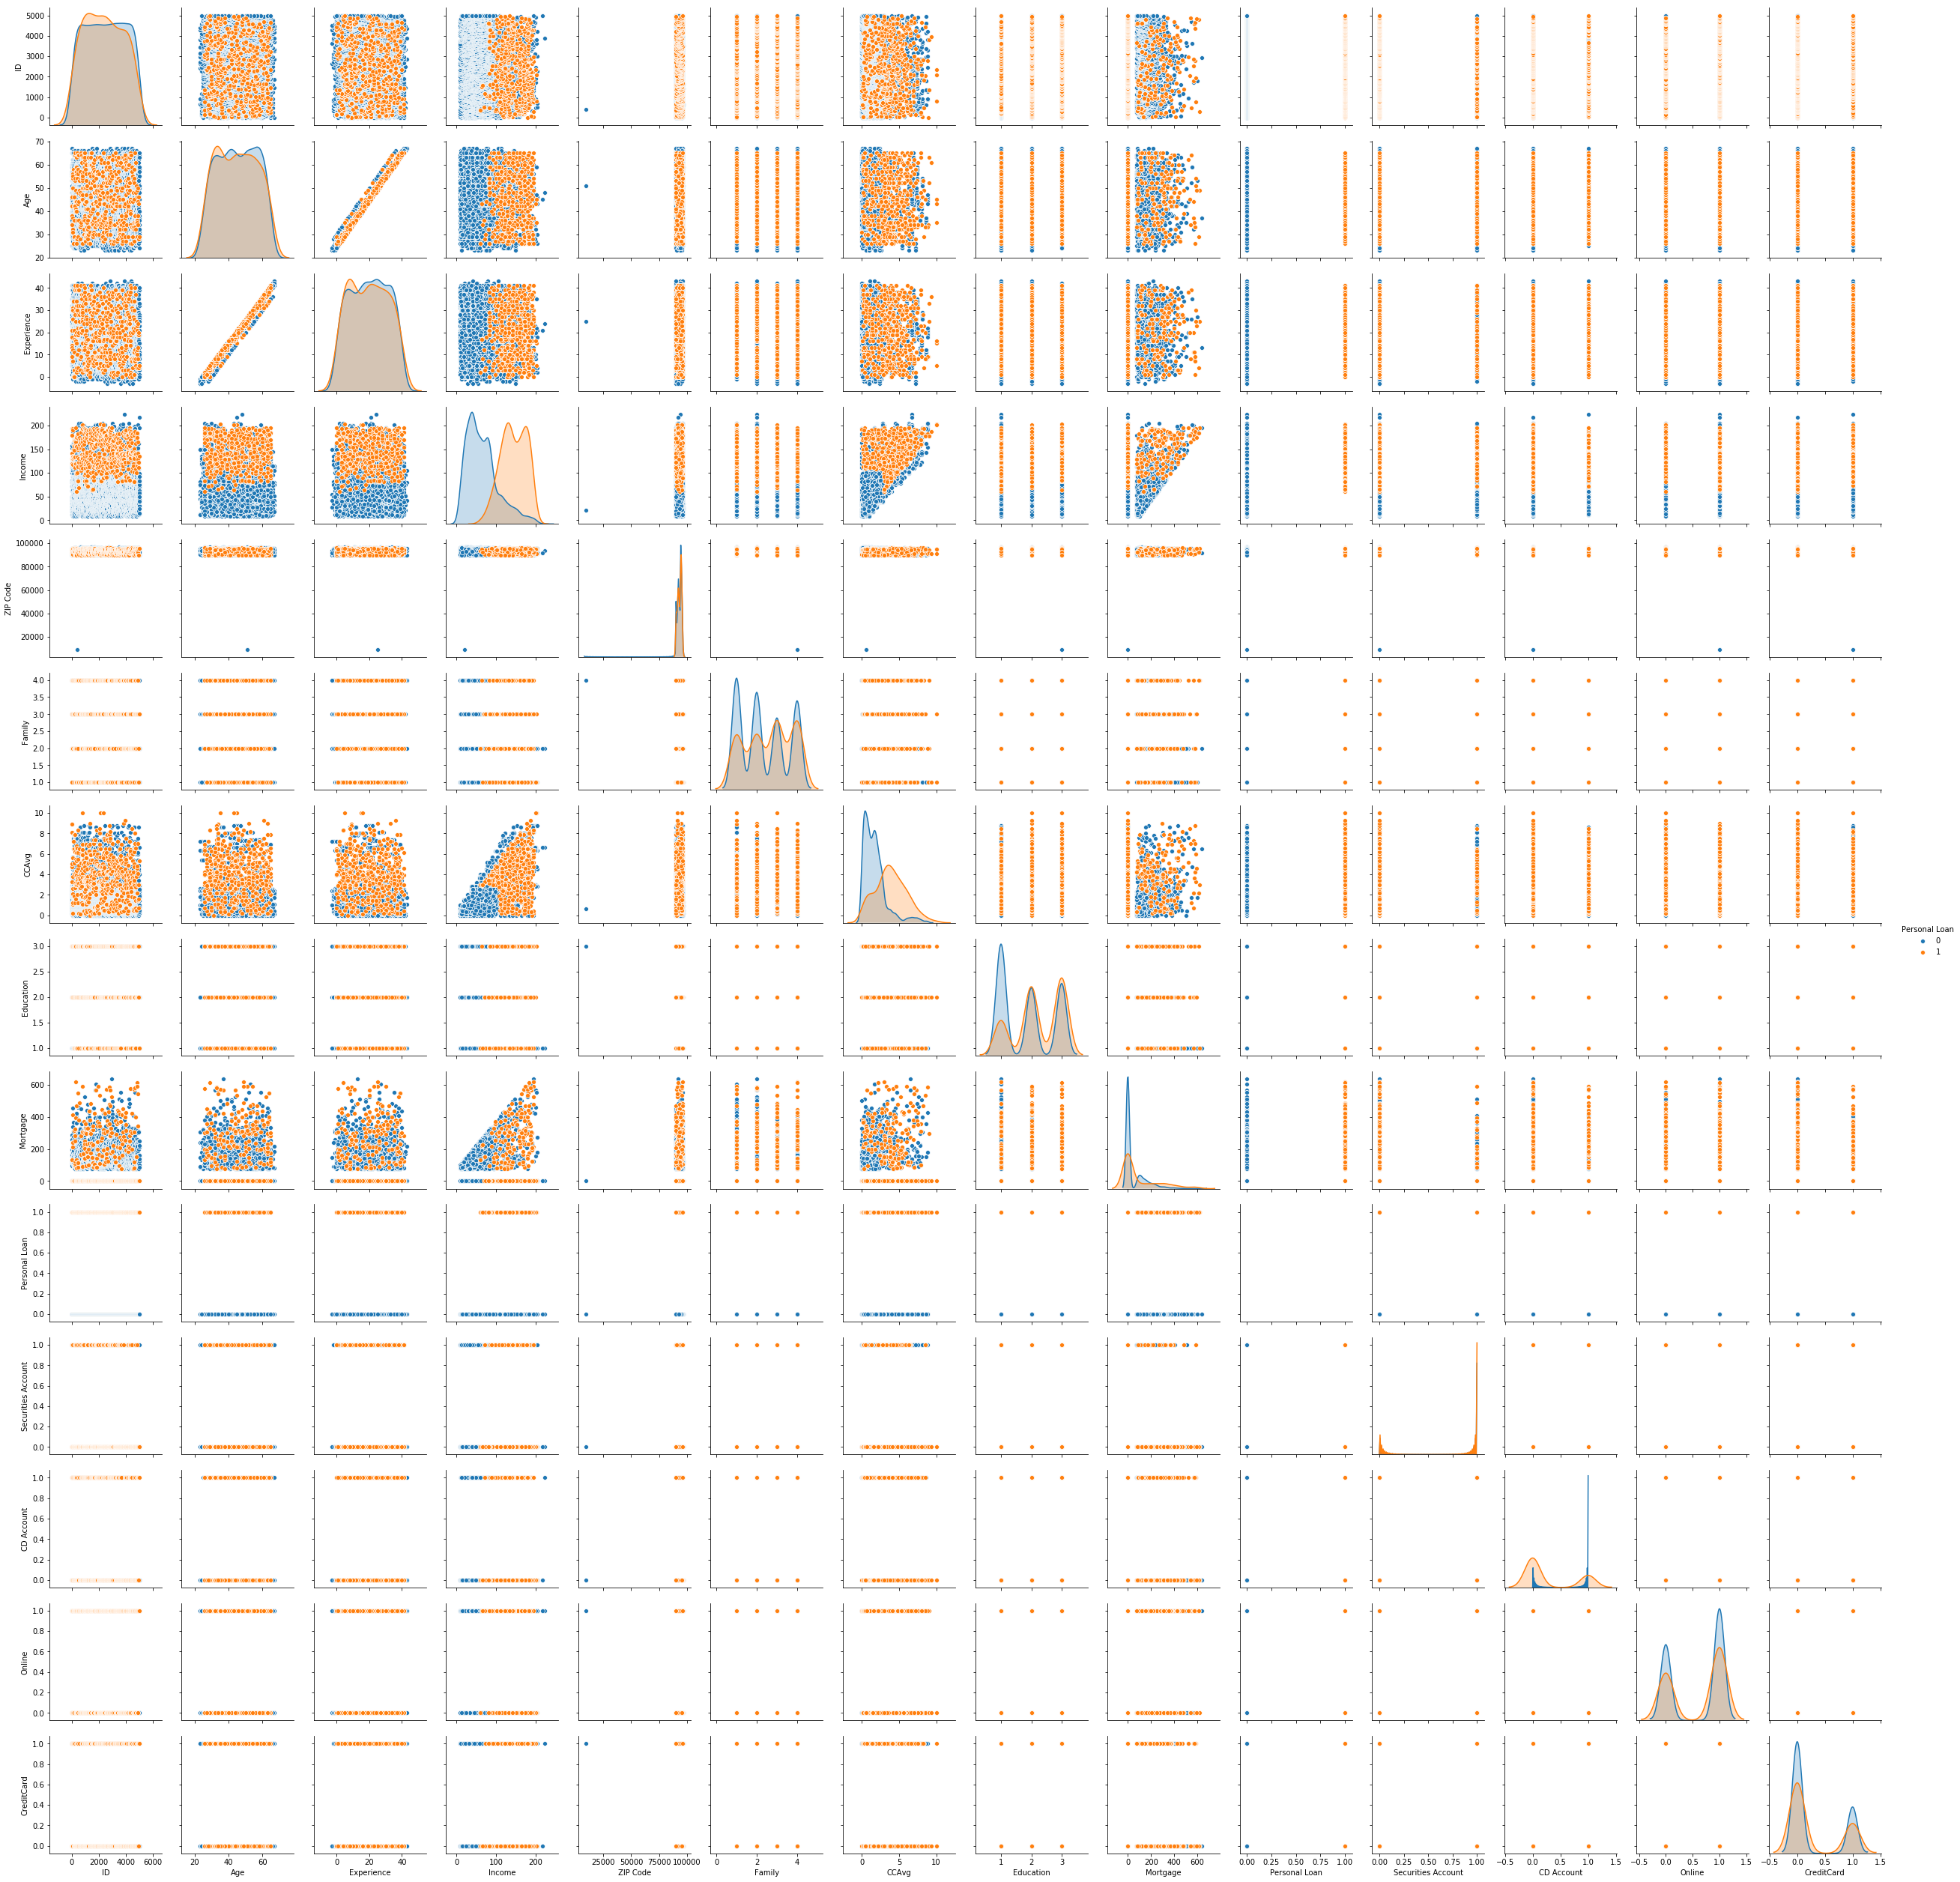

In [12]:
#Bivariate Analysis
sns.pairplot(df,diag_kind='kde',hue='Personal Loan')

In [35]:
#Printing the correlation matrix
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [13]:
#To get the further analysis, I wanted to see if I can see by classes what is the distribution and 
#to see how my model will be able to predict the classes of people who will be opting for the personal
#loan or not based upon the distribution of the classes in the dataset
#To summarize, I have the below findings:
#1. Age and Experience are have overlapping classes and based upon these values it will be very difficult
#to predict the classes as the central values seem to be overlapping with each other
#2.Income has a clear segregation of the classes and the central values don't seem to be overlapping 
#with each other which can make it a very strong predictor of the classes, thus a very helpful variable
#in my model
#CCAvg is also a strong variable as the classes do not have overlapping central values and thus it 
#could also serve to get me the correct distribution of the classes
#Mortgage will turn out to be not a strong variable for prediction
#There is a very strong correlation between the age and the income values and also the age and 
#experience which is very well expected by the general observation of the attributes


In [14]:
import numpy as np
import pandas as pd
from sklearn import metrics

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#Choosing the dependent and the independent variables, I am not dropping any variables
#here because as per the Naive Bayes Theorem, no variable should be dropped however weak predictor
#It might be, it will provide you some information regarding the variable.

In [17]:
x_ind=df[["Age","Experience","Income","CCAvg","Family","Education","Mortgage","Securities Account","CD Account","Online","CreditCard"]]

In [18]:
y_dep=df[["Personal Loan"]]

In [19]:
train_set,test_set,train_labels,test_labels=train_test_split(x_ind,y_dep,test_size=0.30)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression(solver='lbfgs' , max_iter=5000 , multi_class='multinomial')

In [22]:
#Fitting the Logistic Regression Model on the datset
model.fit(train_set,train_labels)

C:\Users\rachi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
#Testing the model on the training data we achive an accuracy score of 95%
model.score(train_set,train_labels)

0.9514285714285714

In [24]:
test_pred = model.predict(test_set)

print(metrics.classification_report(test_labels, test_pred))
print(metrics.confusion_matrix(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1363
           1       0.80      0.58      0.67       137

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.88      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500

[[1343   20]
 [  58   79]]


In [25]:
#Doing a K fold cross validation to see the accuracy score

from sklearn.model_selection import cross_val_score, cross_val_predict
scores = cross_val_score(model, train_set, train_labels, cv=10)
print("Cross-validated scores:", scores , scores)
print("Average score:" , np.average(scores))

C:\Users\rachi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rachi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rachi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rachi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validated scores: [0.95726496 0.94586895 0.94017094 0.94571429 0.94857143 0.96
 0.95142857 0.9713467  0.95702006 0.93982808] [0.95726496 0.94586895 0.94017094 0.94571429 0.94857143 0.96
 0.95142857 0.9713467  0.95702006 0.93982808]
Average score: 0.9517213971426006


In [26]:
#From the confusion matrix, I see that we achive a very high accuracy in the '0' class, which is the 
#n=uber of customer who did not take the loan but we do not get a very good accuracy in the "1" class, 
#which is the number of customer who did take the loan, thus we need more accuracy in the case which we
#do not get by the logistic regression
#By seeing the K fold cross validation, I can see that the model level accuracy is very high but the 
#class level accuracy needs to improve more

In [27]:
#Applying the Naive Bayes Algorithm

In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set

model2 = GaussianNB()
model2.fit(train_set, train_labels)

C:\Users\rachi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
model2.score(train_set , train_labels) 

0.8885714285714286

In [31]:
test_pred = model2.predict(test_set)

print(metrics.classification_report(test_labels, test_pred))
print(metrics.confusion_matrix(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1363
           1       0.46      0.66      0.54       137

   micro avg       0.90      0.90      0.90      1500
   macro avg       0.71      0.79      0.74      1500
weighted avg       0.92      0.90      0.91      1500

[[1257  106]
 [  47   90]]


In [32]:
#In this, I see that the class level accuracy has gone down further, the model is able to predict the 
#"0" classes as is with high accuracy but not the "1" classes, the accuracy has gone down further

In [33]:
from sklearn.model_selection import cross_val_score, cross_val_predict



scores = cross_val_score(model2, train_set, train_labels, cv=10)
print("Cross-validated scores:", scores , scores)
print("Average score:" , np.average(scores))

C:\Users\rachi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rachi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rachi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rachi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Cross-validated scores: [0.87464387 0.88319088 0.86609687 0.88285714 0.90857143 0.88285714
 0.87428571 0.91690544 0.89398281 0.87965616] [0.87464387 0.88319088 0.86609687 0.88285714 0.90857143 0.88285714
 0.87428571 0.91690544 0.89398281 0.87965616]
Average score: 0.8863047465110503


C:\Users\rachi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
#In this case, the Logistic Regression Seems to perform better than the Naive Bayes because the overall
#accuracy score and the class level accuracy seems to be high in the Logistic Regression Model and 
#it would thus be a better fit as a model.
#Gaussian NB makes an assumption that all the variables are not related to each other.
#